In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm    

In [2]:
def accel(m1,m2,mu,factor):
    return (m2 + factor*mu*m1*np.cos(theta*dtor)-m1*np.sin(theta*dtor))/(m1+m2)*g

In [33]:
nsteps = 51

mu_k = 0.400
mu_s_max = 0.600
theta = 90.0
g = 9.80

dtor = np.pi/180.0

m1 = np.zeros(nsteps)
m2 = np.zeros(nsteps)
a = np.zeros((nsteps,nsteps))

debug = False

for i in range(nsteps):
    for j in range(nsteps):
        
        m1[i] = 1.0 + (i)/(nsteps-1)*9.0
        m2[j] = 1.0 + (j)/(nsteps-1)*9.0
        
        a_right_static = accel(m1[i],m2[j],mu_s_max,-1)
        a_left_static = accel(m1[i],m2[j],mu_s_max,1)
        
        if debug: print ("m1 = %0.3f, m2 = %0.3f, a_right_static = %0.3f  a_left_static = %0.3f" % (m1[i],m2[j],a_right_static,a_left_static))

        if (a_right_static > 0 and a_left_static > 0):
            if debug: print ("Motion to the right")
            a[i][j] = accel(m1[i],m2[j],mu_k,-1)
        else: 
            if (a_right_static < 0 and a_left_static < 0):
                if debug: print ("Motion to the left")
                a[i][j] = accel(m1[i],m2[j],mu_k,1)
            else:
                if debug: print ("No motion")
                a[i][j] = 0
                
        if debug: print ("m1 = %0.3f, m2 = %0.3f, a = %0.3f" % (m1[i],m2[j],a[i][j]))

<IPython.core.display.Javascript object>


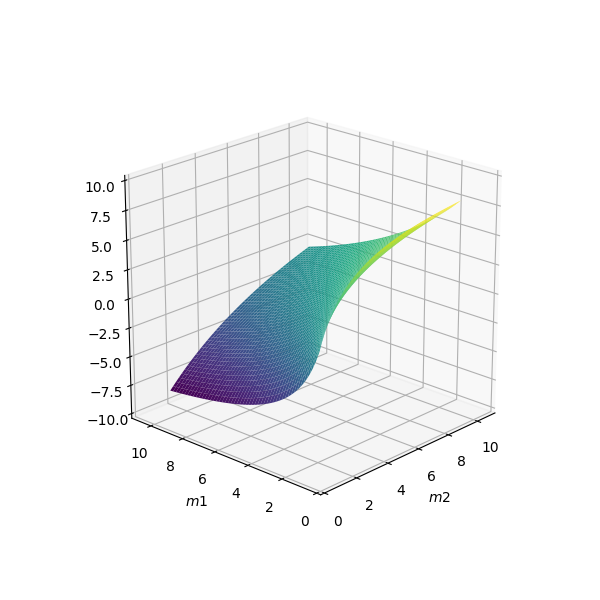

(-10.0, 10.0)

In [32]:
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(m1, m2)
ax.plot_surface(X, Y, a, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$m2$')
ax.set_ylabel('$m1$')
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)
ax.set_zlim(-10, 10)